# Spotify Popularity Predictor
## By: Carter Mooring, and Armando Valdez

CPSC 322, Spring 2021

In [18]:
import importlib
import pprint
import csv
import os
import random

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

fname = os.path.join("data", 'track-audio-features-all.txt')
track_data = MyPyTable().load_from_file(fname)

# Introduction
We used a Spotify dataset that consisted of about 32,000 songs that we then cut down to 5,000. At frist we wanted to come up with a way to use classifiers such as Naive Bayes and Random Forest to give users song recommendations based on a certain playlist. Unfortunately after digging furhter into the whole idea of song recommendations we decided that we would not be able to the project in the given amount of time. As a result we turned to plan B which was using differnet song attributes in order to predict the popularity of a song. We found that Naive Bayes worked best with out data set, giving us a average of 44% accuracy which is very good for our classifier.  

In [19]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.format_num(track_data.get_column('danceability'))
energy = myutils.format_num(track_data.get_column('energy'))
loudness = track_data.get_column('loudness')
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = track_data.get_column('tempo')
valence = myutils.format_num(track_data.get_column('valence'))
popularity = track_data.get_column("track_popularity")


genre_bins = myutils.bin_genre(genre)
dance_bins = myutils.bin_vals(danceability)
energy_bins = myutils.bin_vals(energy)
loudness_bins = myutils.bin_loudness(loudness)
speechiness_bins = myutils.bin_vals(speechiness)
tempo_bins = myutils.bin_tempo(tempo)
valence_bins = myutils.bin_vals(valence)
popularity_bins = myutils.bin_vals(popularity)

# Data Analysis
Our data set includes a lot of different attributes for each song, 23 attrbutes to be exact. These attributes range from 'song id's' so that they could be looked up using Spotify's API to 'runtime' which denotes the duration a song last. For the purposes of our goal we stuck with 7 different attributes for our classification. Specifically we used playlist_subgenre(String), danceability(float), energy(float), loudness(float), speechiness(float), tempo(float), and valnece(float). 

1. playlist_subgenre(String): A string used to classify which type of genre a song is under

1. danceability(float): Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

1. energy(float): Energy represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

1. loudness(float): The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).

1. speechiness(float): Speechiness detects the presence of spoken words in a track.

1. tempo(float): The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

1. valnece(float): Describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.

## Data Summary

The Following Charts display some of the key data visualizations that we took into account when parsing and manipulating our data to get a better all around classification for popularity. We noticed that when it came to Energy (Figure 2) on average songs that would rank as a '10' in popularity had the lowest average Energy out of all other songs. Songs that ranked in the lowest popularity range on average had a higher Energy level than all other songs in our data set. This came as a surprise since we thought the more energy a song had the more popular it would be. Besides this small surprise all other averages for danceability, loudness, speechiness, tempo, and valence seem to be very close across our 10 different Popularity bins. THere are also some unique corralations between popularity and other attributes in our data set which can be seen in Figures 4 - 7.
    

# Figure 1
Shows the average Daceability Distribution for each Popularity bin

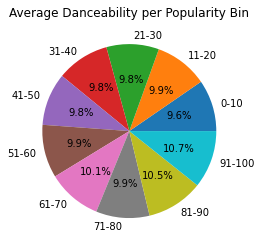

In [20]:
data = myutils.get_popularity_avg(track_data, 11)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.percent_global_sales(x_vals, y_vals,  "Average Danceability per Popularity Bin")

# Figure 2
Shows the average Energy Distribution for each Popularity bin

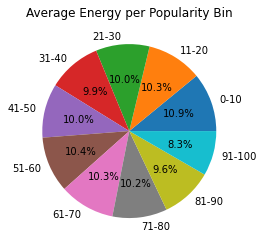

In [21]:
data = myutils.get_popularity_avg(track_data, 12)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.percent_global_sales(x_vals, y_vals,  "Average Energy per Popularity Bin")

# Figure 3
Shows the average Speechiness for each Popularity bin. Based on the graph the most popular songs tend to have an average of more words in them than other songs.

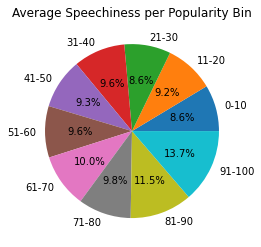

In [22]:
data = myutils.get_popularity_avg(track_data, 16)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.percent_global_sales(x_vals, y_vals,  "Average Speechiness per Popularity Bin")

# Figure 4

This figure shows the correlation between between Popularity vs. Danceability

best fit line: y = 61.7725 + ( 0.0484 )x


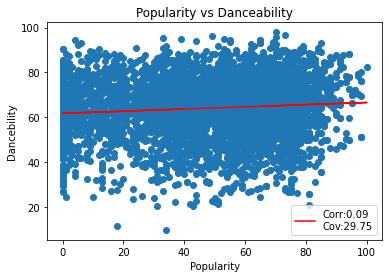

In [23]:
popularity =  track_data.get_column("track_popularity")
danceability = track_data.get_column("danceability")
for i in range(len(danceability)):
    danceability[i] = round(danceability[i] * 100, 2)
plot_utils.plot_scatter(popularity, danceability, "Popularity vs Danceability", "Popularity", "Dancebility")


# Figure 5

This figure shows the correlation between between Popularity vs. Energy

best fit line: y = 73.7546 + ( -0.0563 )x


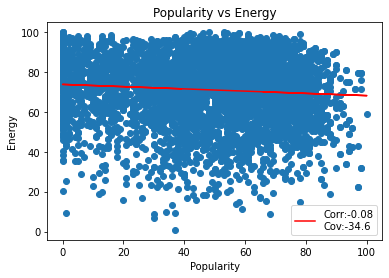

In [24]:
popularity =  track_data.get_column("track_popularity")
energy = track_data.get_column("energy")
for i in range(len(energy)):
    energy[i] = round(energy[i] * 100, 2)
plot_utils.plot_scatter(popularity, energy, "Popularity vs Energy", "Popularity", "Energy")

# Figure 6

This figure shows the correlation between between Popularity vs. Speechiness

best fit line: y = 6.5447 + ( 0.0197 )x


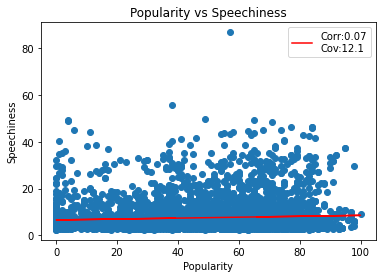

In [25]:
popularity =  track_data.get_column("track_popularity")
speechiness = track_data.get_column("speechiness")
for i in range(len(speechiness)):
    speechiness[i] = round(speechiness[i] * 100, 2)
plot_utils.plot_scatter(popularity, speechiness, "Popularity vs Speechiness", "Popularity", "Speechiness")

# Figure 7

This figure shows the correlation between between Popularity vs. Valence

best fit line: y = 50.3398 + ( 0.0121 )x


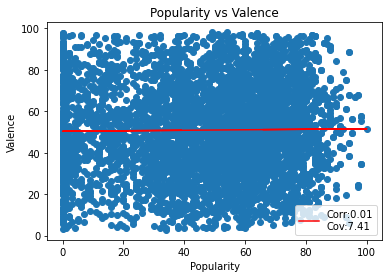

In [26]:
popularity =  track_data.get_column("track_popularity")
valence = track_data.get_column("valence")
for i in range(len(valence)):
    valence[i] = round(valence[i] * 100, 2)
plot_utils.plot_scatter(popularity, valence, "Popularity vs Valence", "Popularity", "Valence")

## Classification Results
For classification we test over 3 different classifiers, Naive Bayes, Decision Tree, and Random Forest. The comparisons were performed using Stratified K Fold Cross Validation to train and test our 3 classifiers. We used Accuracy as our performance measure to get a better sense of how well our classifiers were predicting song popularity. Each Classifier performed to the best of its ability. Naive Bayes produced 44.58% Accuracy and ended up being our best classifier. My Decision Tree averaged 16% accuracy, and after testing multiple M, N, and F values for Random Forest, the best Accuracy we could get on average was 26% for M=2, N=7, F=3

Naive Bayes Deployment Link: "https://spotify-popularity-classifier.herokuapp.com/

In [27]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.convert_to_rank(myutils.format_num(track_data.get_column('danceability')))
energy = myutils.convert_to_rank(myutils.format_num(track_data.get_column('energy')))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.convert_to_rank(myutils.format_num(track_data.get_column('valence')))

x_vals = [[genre[i], danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))

strat_train_folds, strat_test_folds = myevaluation.stratified_kfold_cross_validation(x_vals, y_vals, 10)
strat_xtrain, strat_ytrain, strat_xtest, strat_ytest = myutils.get_from_folds(x_vals, y_vals, strat_train_folds, strat_test_folds)

myNb = MyNaiveBayesClassifier()
myNb.fit(strat_xtrain, strat_ytrain)

predicted = myNb.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('Nive Bayes: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

Nive Bayes: Accuracy = 44.58 Error Rate =  55.42


In [28]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.convert_to_rank(myutils.format_num(track_data.get_column('danceability')))
energy = myutils.convert_to_rank(myutils.format_num(track_data.get_column('energy')))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.convert_to_rank(myutils.format_num(track_data.get_column('valence')))

x_vals = [[genre[i], danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))


my_tree = MyDecisionTreeClassifier()
my_tree.fit(strat_xtrain, strat_ytrain)

predicted = my_tree.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('My Decision Tree: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

My Decision Tree: Accuracy = 16.66 Error Rate =  83.34


In [29]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.convert_to_rank(myutils.format_num(track_data.get_column('danceability')))
energy = myutils.convert_to_rank(myutils.format_num(track_data.get_column('energy')))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.convert_to_rank(myutils.format_num(track_data.get_column('valence')))

x_vals = [[genre[i], danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))


rand_forest = MyRandomForestClassifier(3, 7, 2)
rand_forest.fit(strat_xtrain, strat_ytrain)
predicted = rand_forest.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('My Decision Tree: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

My Decision Tree: Accuracy = 11.72 Error Rate =  88.28


# Conclusion
We really enjoyed using the Spotify data set. We found it very interesting and learned about a lot of the things that go into classifying music. Learning the Spotify API ins and outs was a great expirience even if we didn't get to use it to its fullest potential. In terms of improvements we ideally would like to have more than 5000 instances and more than 4 subgenres. This I think would increase our accuracy and give us a more diverse data set. To improve classification we could add more attributes to those being used for classification or perhaps switch up the attributes and classify on completely different attributes.